<a href="https://colab.research.google.com/github/ngc40384039/Luna/blob/main/SAXSAnalysis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rg = 93.96 nm, I(0) = 7.39, R² = 0.878


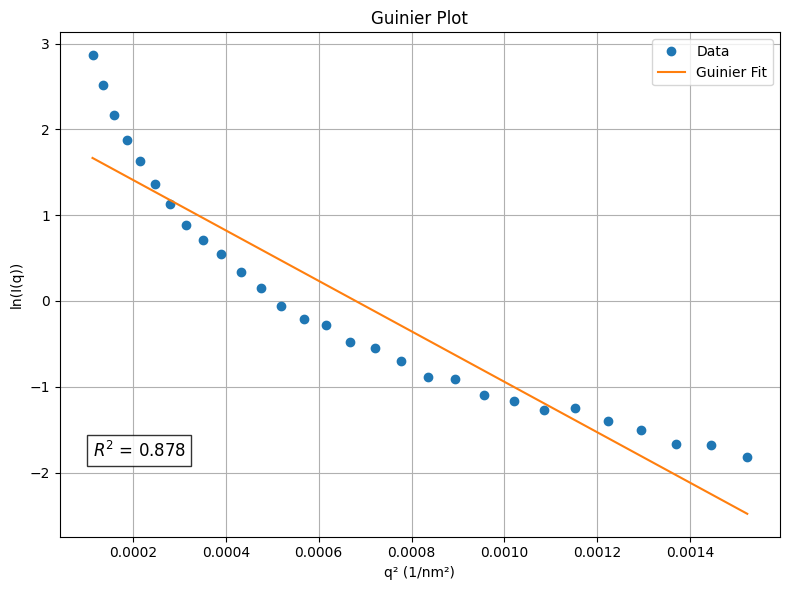

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load data
data = np.loadtxt("/content/PEG1_1.dat")
q = data[:, 0]
Iq = data[:, 1]

# Filter low-q data for Guinier region
mask = (q>=0.01) & (q<=0.04)  # adjust based on your sample
q_fit = q[mask]
Iq_fit = Iq[mask]

# Linear fit: ln(I) vs q^2
lnI = np.log(Iq_fit)
q2 = q_fit**2
slope, intercept, r_value, *_ = linregress(q2, lnI)

# Parameters
Rg = np.sqrt(-3 * slope)
I0 = np.exp(intercept)
R2 = r_value ** 2  # Coefficient of determination

# Print results
print(f"Rg = {Rg:.2f} nm, I(0) = {I0:.2f}, R² = {R2:.3f}")

# Plot
plt.figure(figsize=(8, 6))
plt.plot(q2, lnI, 'o', label='Data')
plt.plot(q2, slope*q2 + intercept, '-', label='Guinier Fit')
plt.xlabel('q² (1/nm²)')
plt.ylabel('ln(I(q))')
plt.title('Guinier Plot')
plt.legend()
plt.grid(True)

# Add R² to plot
plt.text(q2.min(), lnI.min(), f'$R^2$ = {R2:.3f}', fontsize=12,
         bbox=dict(facecolor='white', edgecolor='black', alpha=0.8))

plt.tight_layout()
plt.show()
